['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions']
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post

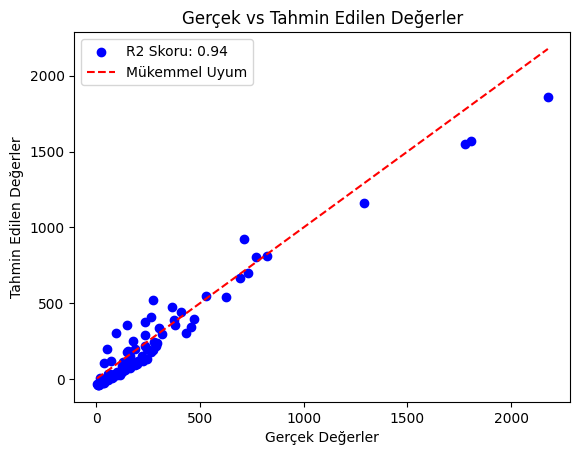

R-squared (R2) Score: 0.9351769732331993
Test Seti R-kare Değeri: 0.9351769732331993
Eğitim Seti MSE Değeri: 186357.1980575452
Test Seti MSE Değeri: 192823.1435886931
Eğitim Seti MAE Değeri: 200.57172944850092
Test Seti MAE Değeri: 255.4216409678172
Ağırlık Matrisi: [  4.61009361  32.13404675 318.8873599   17.72525379]
Eğitim Seti Toplam Kare Hatayı (SSE): 49251.73529266391
Test Seti Toplam Kare Hatayı (SSE): 44131.56688184661


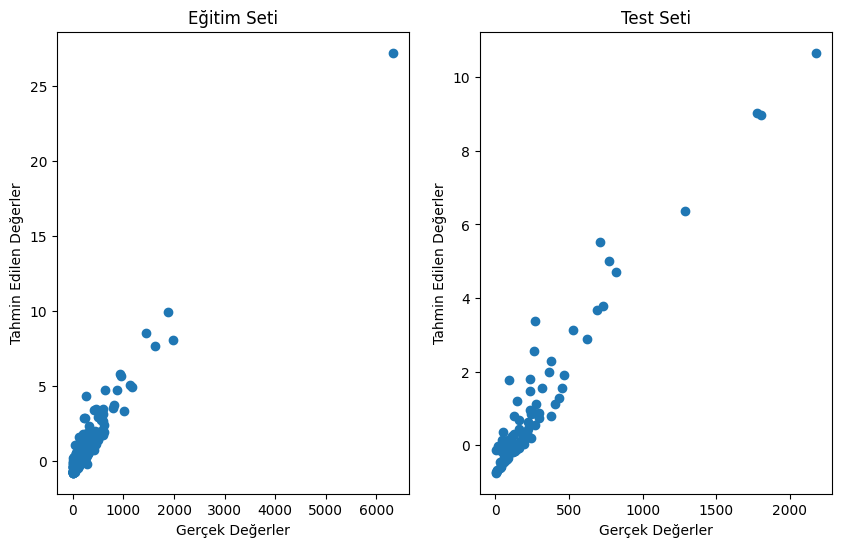

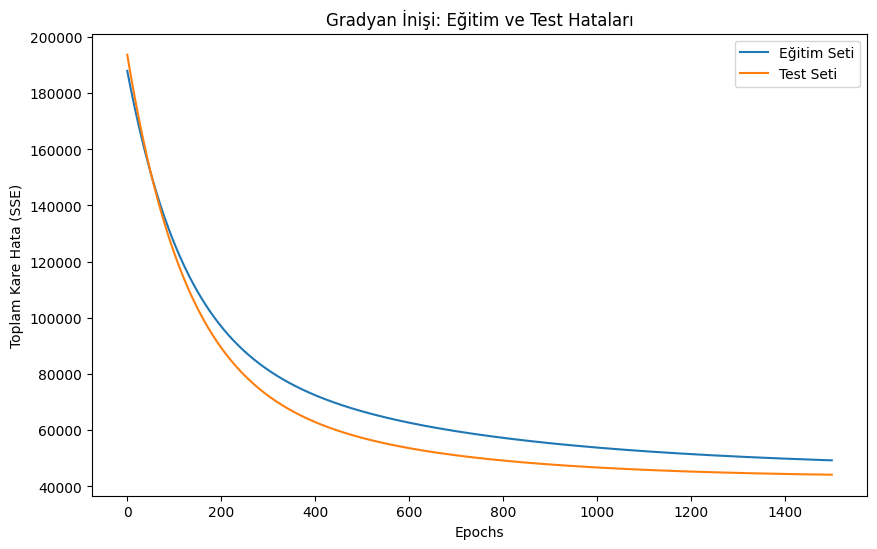

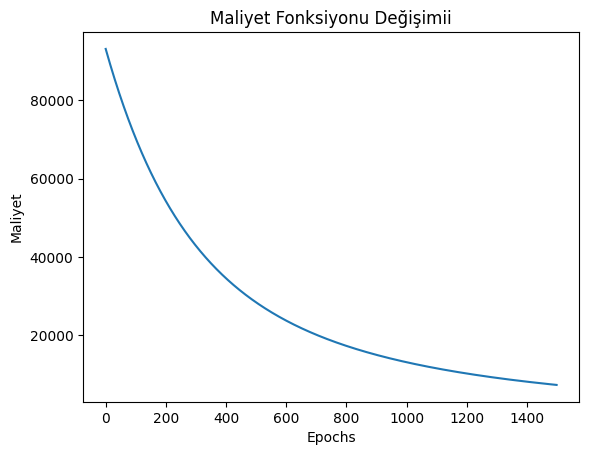

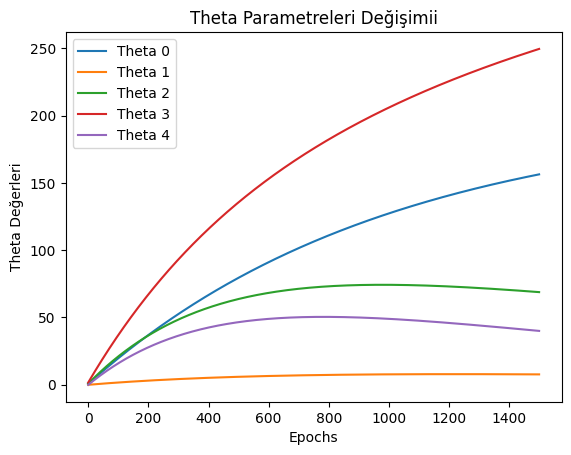

In [6]:
#gerekli kütüphaneleri alıyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



#veri setini CSV uzantılı dosyadan aldık
data = pd.read_csv("dataset_Facebook.csv", delimiter=';')

# DataFrame'deki tüm sütun isimlerini al
tum_sutunlar = data.columns.tolist()

# Tüm sütun isimlerini ekrana yazdır
print(tum_sutunlar)

# Kullanılmayan sütunları belirle
kullanilmayan_sutunlar = ['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 
                          'Lifetime Engaged Users', 'Lifetime Post Consumers', 
                          'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 
                          'comment','share']

# Kullanılmayan sütunları veri setinden sil
data = data.drop(kullanilmayan_sutunlar, axis=1)
# Değişiklikleri kaydet
#data.to_csv('dataset_Facebook.csv', index=False)  # index=False ile indeksi kaydetmez


#verileri kontrol edilip boşlukları ortalama değer ile doldurma kısmı 
print(data.isnull().sum())
numeric_columns = data.select_dtypes(include='number').columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) belirleme
X = data[['Page total likes', 'Lifetime Post reach by people who like your Page', 
          'like','Lifetime People who have liked your Page and engaged with your post']]
y = data['Total Interactions']


# Yeni veri setini gözden geçir
print(data.head())


class LinearRegression:
    def __init__(self, X, Y):
        np.random.seed(42)  # Verilerin tekrar üretilebilirliği için rastgele bir tohum değeri belirler
        self.mean = np.mean(X, axis=0)  # X verisinin sütunları için ortalamaları alır
        self.std = np.std(X, axis=0)    # X verisinin sütunları için standart sapmaları hesaplar
        X = (X - self.mean) / self.std  # Özellikleri normalize eder
        ones = np.ones(X.shape[0])      # Bias birimini temsil eden 1'lerden oluşan bir dizi oluşturur
        X = np.column_stack((ones, X))  # Bias birimini X verisine ekler
        self.X = X                      # Normalize edilmiş X verisini saklar
        self.Y = Y                      # Etiketleri saklar
        self.m = X.shape[0]             # Eğitim örneklerinin sayısını saklar
        self.n = X.shape[1]             # Özellik sayısını saklar
        self.theta = np.random.randn(X.shape[1])  # Rastgele theta değerleri oluşturur

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Tahminleri hesaplar
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Hata fonksiyonunu hesaplar
        return self.J

    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []        # Her iterasyondaki maliyet değerlerini saklamak için bir liste oluşturur
        self.theta_history = []       # Her iterasyondaki theta değerlerini saklamak için bir liste oluşturur
        for x in range(num_of_iter):  # Belirlenen iterasyon sayısı kadar döngü yapar
            h = np.matmul(self.X, self.theta)  # Tahminleri hesaplar
            J = self.computeCostFunction()     # Hata fonksiyonunu hesaplar
            self.Cost_history.append(J)       # Maliyet değerini listeye ekler
            self.theta_history.append(self.theta)  # Theta değerlerini listeye ekler
            temp = h - self.Y                    # Geçici bir değişken oluşturur
            self.theta = self.theta - (alpha / self.m) * (self.X.T.dot(temp))  # Gradient iniş adımını uygular
        return self.theta, self.Cost_history, self.theta_history  # En iyi theta değeri ve maliyet geçmişini döndürür

    def calculateR2(self, Y_true, Y_pred):
        # R-kare skorunu hesaplar ve görselleştirir
        r2 = r2_score(Y_true, Y_pred)
        plt.scatter(Y_true, Y_pred, color='blue', label=f'R2 Skoru: {r2:.2f}')
        plt.plot([min(Y_true), max(Y_true)], [min(Y_true), max(Y_true)], linestyle='--', color='red', label='Mükemmel Uyum')
        plt.xlabel('Gerçek Değerler')
        plt.ylabel('Tahmin Edilen Değerler')
        plt.title('Gerçek vs Tahmin Edilen Değerler')
        plt.legend()
        plt.show()
        return r2


    def predictt(self, X_test):
        # X_test verisini eğitim setinin ortalaması ve standart sapması ile normalize eder
        X_test = (X_test - self.mean) / self.std
        ones = np.ones(X_test.shape[0])    # Bias birimini temsil eden 1'lerden oluşan bir dizi oluşturur
        X_test = np.column_stack((ones, X_test))  # Bias birimini X_test verisine ekler

        if X_test.shape[1] != self.X.shape[1]:  # X_test'teki özellik sayısını kontrol eder
            raise ValueError(f"X_test'teki özellik sayısı ({X_test.shape[1]}) eğitimde kullanılan özellik sayısıyla ({self.X.shape[1]}) uyuşmuyor.")

        Y_pred = np.matmul(X_test, self.theta)  # Tahminleri yapar
        return Y_pred  # Tahminleri döndürür

    def predictUsingNormalEquation(self, X_test, Y_test):
        # X_test verisini eğitim setinin ortalaması ve standart sapması ile normalize eder
        X_test = (X_test - self.mean) / self.std
        ones = np.ones(X_test.shape[0])    # Bias birimini temsil eden 1'lerden oluşan bir dizi oluşturur
        X_test = np.column_stack((ones, X_test))  # Bias birimini X_test verisine ekler

        inv = np.linalg.inv(np.matmul(self.X.T, self.X))  # X'in transpozesi ile X'in çarpımının tersini alır
        self.w = np.matmul(np.matmul(inv, self.X.T), self.Y)  # Normal denklemi kullanarak theta'yı hesaplar
        y_pred = np.matmul(X_test, self.w)  # Tahminleri yapar

        return y_pred, (abs(Y_test - y_pred) / Y_test) * 100  # Tahminleri ve yüzde hata değerlerini döndürür
    
    def returnTheta(self):
        return self.theta

    def returnX(self):
        return self.X

    def returnY(self):
        return self.Y

#verileri ölçeklendirdik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#veri setini %80 eğitim ve %20 test verisi olacak şekilde böldük/ayırdık 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=39)

#doğrusal regresyon modelini oluşturduk
model = LinearRegression(X_train, y_train)

#eğitim ve test setleri üzerinde tahminler yapıldığı kısım
y_train_pred = model.predictt(X_train)
y_test_pred = model.predictt(X_test)

#performans ölçümlerini hesapladık
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)


theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1500, alpha=0.001)

Y_pred = model.predictt(X_test)


#eğitim seti için R-kare değerini hesapladık

#test seti için R-kare değerini hesapladık
r2_test = r2_score(y_test, Y_pred)


r2_score_value = model.calculateR2(y_test, Y_pred)
print(f'R-squared (R2) Score: {r2_score_value}')


#eğitim seti için Ortalama Mutlak Hata değerini hesapladık
mae_train = mean_absolute_error(y_train, y_train_pred)
#test seti için Ortalama Mutlak Hata değerini hesapladık
mae_test = mean_absolute_error(y_test, y_test_pred)


print("Test Seti R-kare Değeri:", r2_test)

print("Eğitim Seti MSE Değeri:", train_error)
print("Test Seti MSE Değeri:", test_error)

print("Eğitim Seti MAE Değeri:", mae_train)
print("Test Seti MAE Değeri:", mae_test)

#eğitim ve test setlerinde gerçek ve tahmin edilen değerleri görselleştirdik
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Eğitim Seti")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Test Seti")


#gradyan inişi fonksiyonu tanımladık
def gradient_descent(X, y, learning_rate, epochs):
    #bağımsız değişkenlerin özellik sayısını al
    num_features = X.shape[1]
    
    #agırlıkları sıfırlar ile başlat
    weights = np.zeros(num_features)
    
    #veri kümesindeki gözlem sayısını al
    n = len(y)
    
    #eğitim ve test seti hatalarını saklamak için boş listeler oluştur
    train = []
    test = []

    #belirlenen epoch sayısı kadar iterasyon yap
    for epoch in range(epochs):
        # Modelin güncel ağırlıklarıyla tahmin yapılır
        y_pred = np.dot(X, weights)
        
        #hata hesaplanıyor
        error = y_pred - y
        
        #gradyanı iniş algoritmasını güncelliyoruz
        gradient = (2/n) * np.dot(X.T, error) # --> Hatanın bağımsız değişkenlerinin transpoze matrisi ile çarpılmasıdır.ve her bir özelliğin hataya olan katkısını gösteren bir vektörü üretir.
        
        # Ağırlıkları güncelliyoruz
        weights -= learning_rate * gradient
        
        #eğitim seti üzerindeki hatayı kaydediyoruz
        train.append(np.sum(error**2) / n)
        
        #test seti üzerindeki hatayı kaydediyoruz
        test.append(np.sum((np.dot(X_test, weights) - y_test)**2) / len(y_test))
        
    #son ağırlıkları, eğitim seti hataları ve test seti hatalarını döndürüyoruz
    return weights, train, test

#gradyan inişini için tanımladığımız fonksiyonu çağırıyoruz
weights, train_error, test_error = gradient_descent(X_train, y_train, learning_rate=0.001, epochs=1500)

#gradyan inişi sonuçlarını ekrana yazdırıyoruz
print("Ağırlık Matrisi:", weights)
print("Eğitim Seti Toplam Kare Hatayı (SSE):", train_error[-1])
print("Test Seti Toplam Kare Hatayı (SSE):", test_error[-1])

#gradyan inişinin eğitim ve test hatalarını görselleştiriyoruz
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_error)), train_error, label='Eğitim Seti')
plt.plot(range(len(test_error)), test_error, label='Test Seti')
plt.xlabel('Epochs')
plt.ylabel('Toplam Kare Hata (SSE)')
plt.title('Gradyan İnişi: Eğitim ve Test Hataları')
plt.legend()
plt.show()

# Maliyet fonksiyonu değerlerini çizme
plt.plot(cost_history)
plt.title('Maliyet Fonksiyonu Değişimii')
plt.xlabel('Epochs')
plt.ylabel('Maliyet')
plt.show()

# Theta parametrelerini çizme
theta_history = np.array(theta_history)
for i in range(theta_history.shape[1]):
    plt.plot(theta_history[:, i], label=f'Theta {i}')

plt.title('Theta Parametreleri Değişimii')
plt.xlabel('Epochs')
plt.ylabel('Theta Değerleri')
plt.legend()
plt.show()